## Exploring IMBD's Top 250 Movies (August 2024)

- IMDB Top 250: [https://www.imdb.com/chart/top/](https://www.imdb.com/chart/top/)
- Dataset: [https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv](https://www.kaggle.com/datasets/dimitarmitkov/imdb-top-250/data?select=IMDB_Top250.csv)

In [309]:
import pandas as pd
import seaborn as sns
import json
from ast import literal_eval
import matplotlib.pyplot as plt
import html

In [310]:
data = pd.read_csv("IMDB_Top250.csv")

In [311]:
data.head(2)

,Unnamed: 0,type,url,name,image,description,rating,rating_count,content_rating,genre,...,creator,duration,popularity,metascore,plot,interests,budget_amount,budget_currency,gross_amount,gross_currency
0,1,Movie,https://www.imdb.com/title/tt0111161/,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...,A Maine banker convicted of the murder of his ...,9.3,2933446,R,['Drama'],...,"[{'@type': 'Organization', 'url': 'https://www...",142,63.0,82.0,A Maine banker convicted of the murder of his ...,"['Epic', 'Period Drama', 'Prison Drama', 'Trag...",25000000.0,USD,28767189.0,USD
1,2,Movie,https://www.imdb.com/title/tt0068646/,The Godfather,https://m.media-amazon.com/images/M/MV5BNTc0ZD...,"Don Vito Corleone, head of a mafia family, dec...",9.2,2044558,R,"['Crime', 'Drama']",...,"[{'@type': 'Organization', 'url': 'https://www...",175,73.0,100.0,"Don Vito Corleone, head of a mafia family, dec...","['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",6000000.0,USD,136381073.0,USD


## Preprocessing

Let's give the rank column a more appropriate name

In [312]:
data = data.rename(columns={"Unnamed: 0": "rank"})

While at it, let's take care of the date column:

In [313]:
data["date"] = pd.to_datetime(data["date"])

Finally, let's take care of some unescaped characters:

In [314]:
data["name"] = data["name"].apply(html.unescape)

## Global Chart Styles

In [324]:
plt.style.use('fivethirtyeight')

## Films

With rank taken into account:

In [336]:
top_films_rank = data[["rank", "name", "rating"]].drop_duplicates().sort_values(
    by=["rank", "rating"], 
    ascending=[True, False]
).head(10)

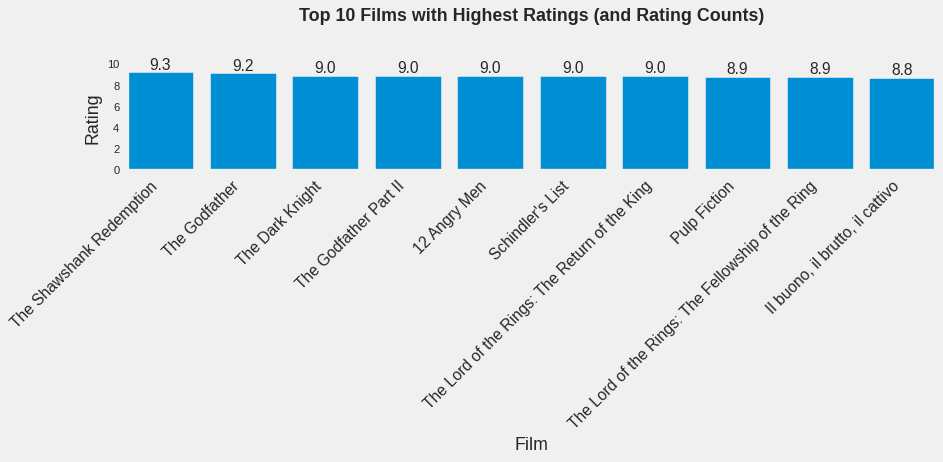

In [337]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(visible=False)
bars = ax.bar(top_films_rank['name'], top_films_rank['rating'])

ax.set_xlabel('Film', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Top 10 Films with Highest Ratings (and Rating Counts)', fontsize=16, fontweight='bold', pad=40)
plt.xticks(rotation=45, ha='right', fontsize=14)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.savefig("top-10-rank.png")
plt.show()

In [338]:
top_films_no_rank = data[["name", "rating"]].drop_duplicates().sort_values(
    by="rating",
    ascending=False
).head(10)

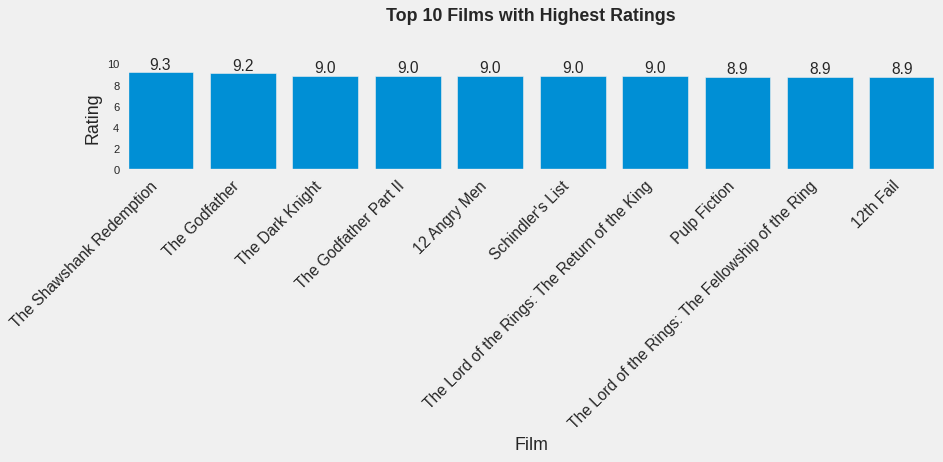

In [339]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(visible=False)
bars = ax.bar(top_films_no_rank['name'], top_films_no_rank['rating'])

ax.set_xlabel('Film', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Top 10 Films with Highest Ratings', fontsize=16, fontweight='bold', pad=40)
plt.xticks(rotation=45, ha='right', fontsize=14)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.savefig("top-10-no-rank.png")
plt.show()

`12th Fail` has a higher ranking (8.9) than `Il buono, il brutto, il cattivo` but less ratings (`127k` vs `883k`), which is why IMDB is placing it lower

In [349]:
top_films_ratings = data[["name", "rating", "rating_count"]].drop_duplicates().sort_values(
    by="rating_count",
    ascending=False
).head(10)

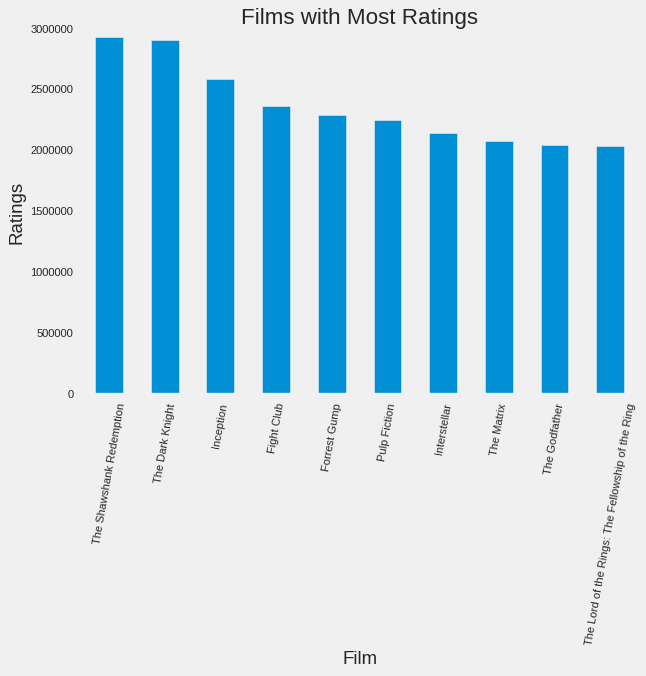

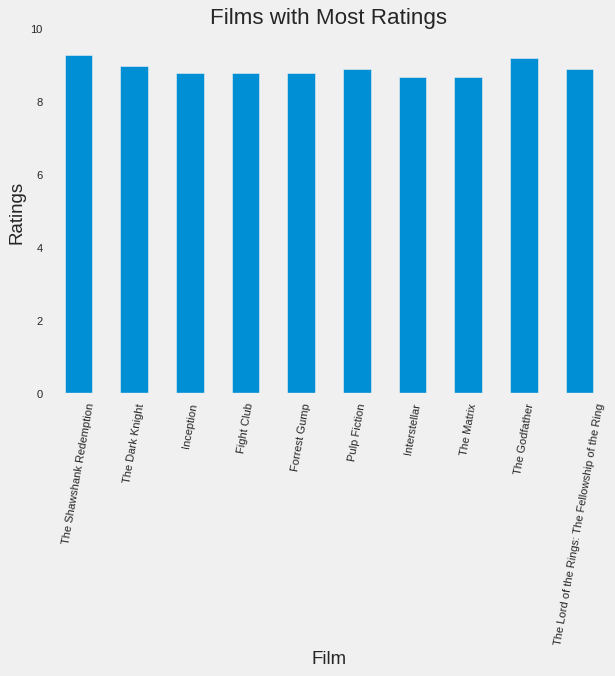

In [357]:
top_films_ratings.plot(kind="bar", xlabel="Film", rot=80, ylabel="Ratings", x="name", y="rating_count", legend=False, grid=False, title="Films with Most Ratings")
top_films_ratings.plot(kind="bar", xlabel="Film", rot=80, ylabel="Ratings", x="name", y="rating", legend=False, grid=False, title="Films with Most Ratings")
for i,v in enumerate(top_films_ratings["rating_count"]):
    plt.text(i,v,f"{round(v / 1_000_000)}M", ha='center', va='bottom')

In [159]:
top_films_budgets_usd = data[data["budget_currency"] == "USD"][["name", "budget_amount"]].drop_duplicates().sort_values(
    by="budget_amount",
    ascending=False
).head(10)

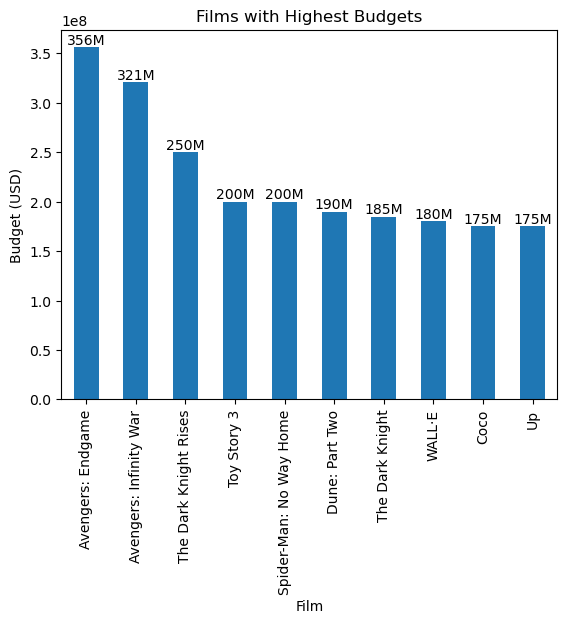

In [162]:
plt = top_films_budgets_usd.plot(kind="bar", xlabel="Film", ylabel="Budget (USD)", x="name", y="budget_amount", legend=False, title="Films with Highest Budgets")
for i,v in enumerate(top_films_budgets_usd["budget_amount"]):
    plt.text(i,v,f"{round(v / 1_000_000)}M", ha='center', va='bottom')

In [164]:
top_films_gross_usd = data[data["gross_currency"] == "USD"][["name", "gross_amount"]].drop_duplicates().sort_values(
    by="gross_amount",
    ascending=False
).head(10)

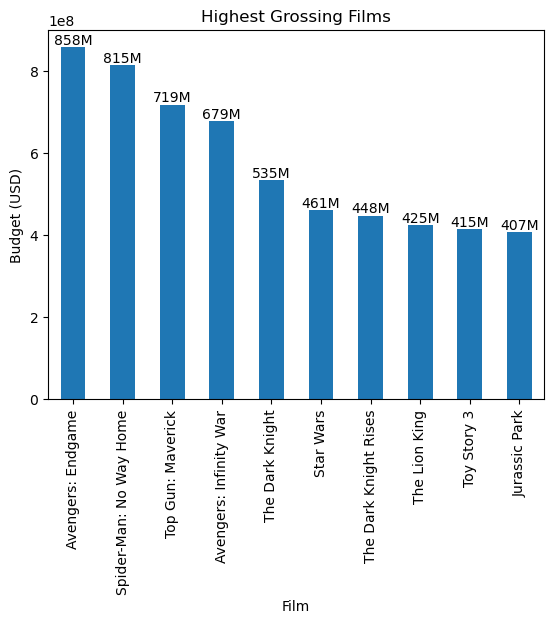

In [166]:
plt = top_films_gross_usd.plot(kind="bar", xlabel="Film", ylabel="Budget (USD)", x="name", y="gross_amount", legend=False, title="Highest Grossing Films")
for i,v in enumerate(top_films_gross_usd["gross_amount"]):
    plt.text(i,v,f"{round(v / 1_000_000)}M", ha='center', va='bottom')

In [204]:
rating_trend = data[["date", "rating"]].set_index("date").resample("YE").mean().dropna()

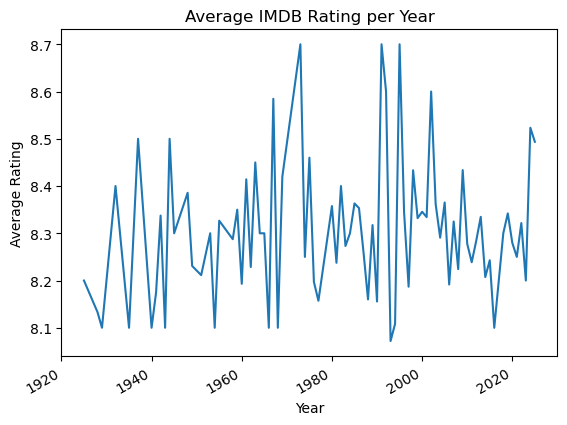

In [205]:
plt = rating_trend.plot(title="Average IMDB Rating per Year", xlabel="Year", ylabel="Average Rating", legend=False)

In [200]:
budget_trend = data[data["budget_currency"] == "USD"][["date", "budget_amount"]].set_index("date").resample("YE").mean().dropna()

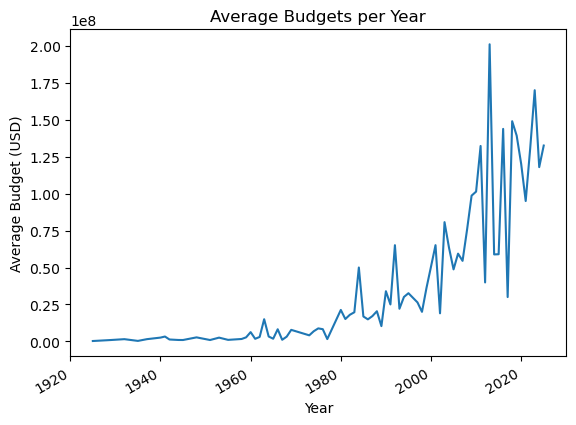

In [206]:
plt = budget_trend.plot(title="Average Budgets per Year", xlabel="Year", ylabel="Average Budget (USD)", legend=False)

In [207]:
gross_trend = data[data["gross_currency"] == "USD"][["date", "gross_amount"]].set_index("date").resample("YE").mean().dropna()

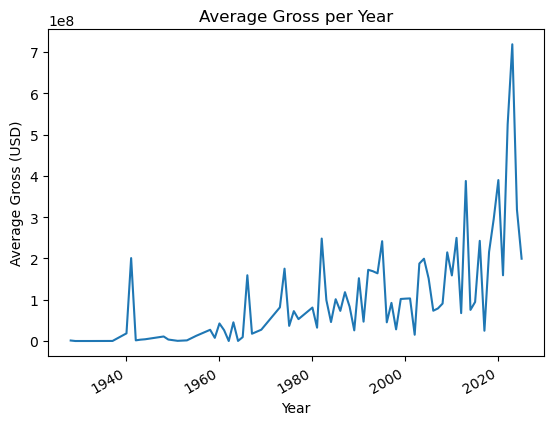

In [208]:
plt = gross_trend.plot(title="Average Gross per Year", xlabel="Year", ylabel="Average Gross (USD)", legend=False)

In [212]:
number_of_films_trend = data[["date", "name"]].set_index("date").resample("YE").count().dropna()

In [216]:
data[data["date"].dt.year == 1924].drop_duplicates()

,rank,type,url,name,image,description,rating,rating_count,content_rating,genre,...,creator,duration,popularity,metascore,plot,interests,budget_amount,budget_currency,gross_amount,gross_currency
133,134,Movie,https://www.imdb.com/title/tt0012349/,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,"The Tramp cares for an abandoned child, but ev...",8.2,136577,Passed,Comedy,...,None,68,NaN,NaN,"The Tramp cares for an abandoned child, but ev...","['Buddy Comedy', 'Slapstick', 'Comedy', 'Drama...",250000.0,USD,NaN,NaN
133,134,Movie,https://www.imdb.com/title/tt0012349/,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,"The Tramp cares for an abandoned child, but ev...",8.2,136577,Passed,Comedy,...,Charles Chaplin,68,NaN,NaN,"The Tramp cares for an abandoned child, but ev...","['Buddy Comedy', 'Slapstick', 'Comedy', 'Drama...",250000.0,USD,NaN,NaN
133,134,Movie,https://www.imdb.com/title/tt0012349/,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,"The Tramp cares for an abandoned child, but ev...",8.2,136577,Passed,Drama,...,None,68,NaN,NaN,"The Tramp cares for an abandoned child, but ev...","['Buddy Comedy', 'Slapstick', 'Comedy', 'Drama...",250000.0,USD,NaN,NaN
133,134,Movie,https://www.imdb.com/title/tt0012349/,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,"The Tramp cares for an abandoned child, but ev...",8.2,136577,Passed,Drama,...,Charles Chaplin,68,NaN,NaN,"The Tramp cares for an abandoned child, but ev...","['Buddy Comedy', 'Slapstick', 'Comedy', 'Drama...",250000.0,USD,NaN,NaN
133,134,Movie,https://www.imdb.com/title/tt0012349/,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,"The Tramp cares for an abandoned child, but ev...",8.2,136577,Passed,Family,...,None,68,NaN,NaN,"The Tramp cares for an abandoned child, but ev...","['Buddy Comedy', 'Slapstick', 'Comedy', 'Drama...",250000.0,USD,NaN,NaN
133,134,Movie,https://www.imdb.com/title/tt0012349/,The Kid,https://m.media-amazon.com/images/M/MV5BZjhhMT...,"The Tramp cares for an abandoned child, but ev...",8.2,136577,Passed,Family,...,Charles Chaplin,68,NaN,NaN,"The Tramp cares for an abandoned child, but ev...","['Buddy Comedy', 'Slapstick', 'Comedy', 'Drama...",250000.0,USD,NaN,NaN
200,201,Movie,https://www.imdb.com/title/tt0015324/,Sherlock Jr.,https://m.media-amazon.com/images/M/MV5BZWFhOG...,"A film projectionist longs to be a detective, ...",8.2,58264,Passed,Action,...,None,45,NaN,NaN,"A film projectionist longs to be a detective, ...","['Bumbling Detective', 'Farce', 'Feel-Good Rom...",NaN,NaN,NaN,NaN
200,201,Movie,https://www.imdb.com/title/tt0015324/,Sherlock Jr.,https://m.media-amazon.com/images/M/MV5BZWFhOG...,"A film projectionist longs to be a detective, ...",8.2,58264,Passed,Action,...,Jean C. Havez,45,NaN,NaN,"A film projectionist longs to be a detective, ...","['Bumbling Detective', 'Farce', 'Feel-Good Rom...",NaN,NaN,NaN,NaN
200,201,Movie,https://www.imdb.com/title/tt0015324/,Sherlock Jr.,https://m.media-amazon.com/images/M/MV5BZWFhOG...,"A film projectionist longs to be a detective, ...",8.2,58264,Passed,Action,...,Joseph A. Mitchell,45,NaN,NaN,"A film projectionist longs to be a detective, ...","['Bumbling Detective', 'Farce', 'Feel-Good Rom...",NaN,NaN,NaN,NaN
200,201,Movie,https://www.imdb.com/title/tt0015324/,Sherlock Jr.,https://m.media-amazon.com/images/M/MV5BZWFhOG...,"A film projectionist longs to be a detective, ...",8.2,58264,Passed,Action,...,Clyde Bruckman,45,NaN,NaN,"A film projectionist longs to be a detective, ...","['Bumbling Detective', 'Farce', 'Feel-Good Rom...",NaN,NaN,NaN,NaN


## Directors

Explode columns with non-scalar values should make analysis easier

In [6]:
data["genre"] = data["genre"].apply(literal_eval)

In [7]:
data["director"] = data["director"].apply(lambda x: [item.get("name") for item in literal_eval(x)])

In [8]:
data["creator"] = data["creator"].apply(lambda x: [item.get("name") for item in literal_eval(x)])

In [9]:
data = data.explode("genre")

In [10]:
data = data.explode("director")

In [11]:
data = data.explode("creator")

In [12]:
directors_with_highest_avg_rating = data[["director", "rating"]].groupby("director").mean().sort_values(by="rating", ascending=False).head(10)

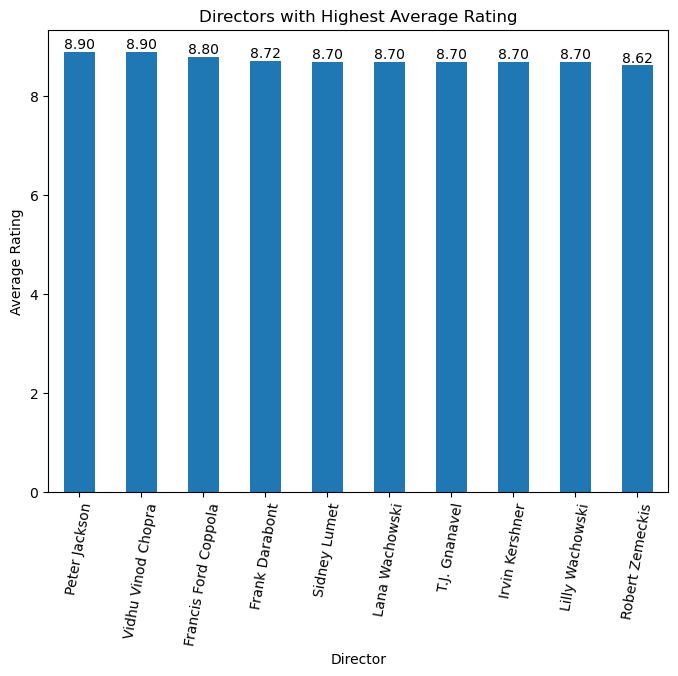

In [13]:
plt = directors_with_highest_avg_rating.plot(kind="bar",
                                             rot=80,
                                             legend=False,
                                             title="Directors with Highest Average Rating",
                                             xlabel="Director",
                                             ylabel="Average Rating",
                                             figsize=(8,6)
                                            )

for i, v in enumerate(directors_with_highest_avg_rating['rating']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

In [14]:
directors_with_most_top250_films = data[["director", "rank"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

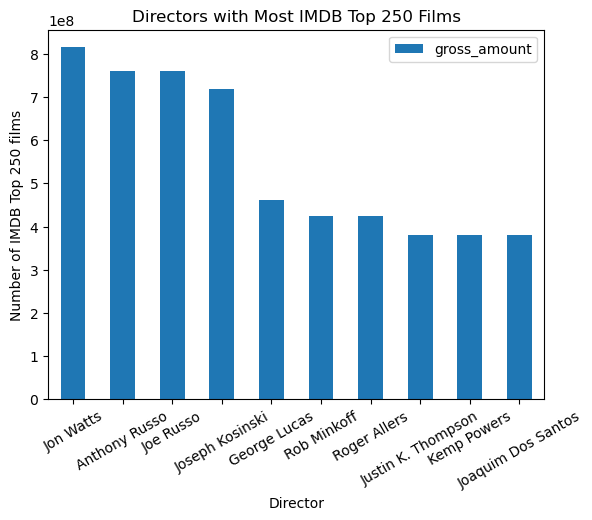

In [81]:
plot = directors_with_most_top250_films.plot(kind="bar", 
                                             rot=30, 
                                             xlabel="Director",
                                             ylabel="Number of IMDB Top 250 films",
                                             title="Directors with Most IMDB Top 250 Films")

In [16]:
directors_with_longest_films = directors_with_most_top250_films = data[["director", "duration"]].groupby("director").mean().sort_values(by="duration", ascending=False).head(10)

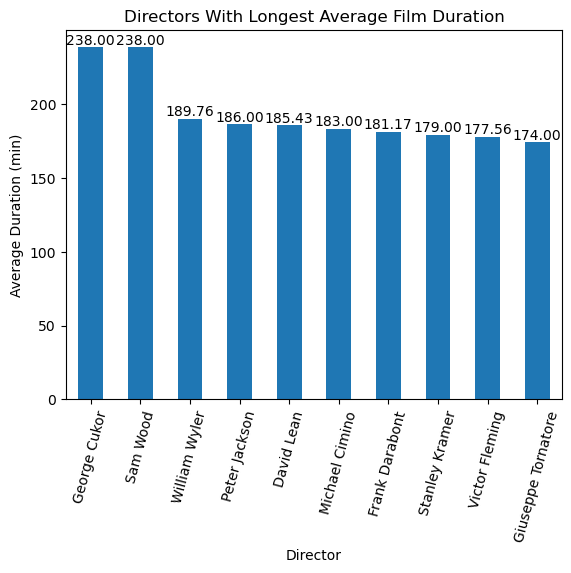

In [17]:
plt = directors_with_longest_films.plot(kind="bar",
                                        rot=75,
                                        xlabel="Director",
                                        ylabel="Average Duration (min)",
                                        legend=False,
                                        title="Directors With Longest Average Film Duration"
                                       )

for i, v in enumerate(directors_with_longest_films['duration']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

In [35]:
directors_with_highest_average_gross_usd = data[data["gross_currency"] == "USD"][["director", "gross_amount"]].groupby("director").mean().sort_values(by="gross_amount", ascending=False).head(10)

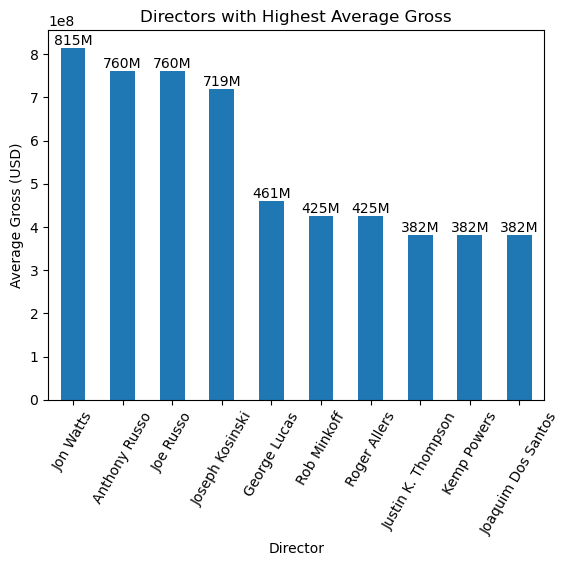

In [36]:
plt = directors_with_highest_average_gross_usd.plot(kind="bar",
                                                    title="Directors with Highest Average Gross",
                                                    xlabel="Director",
                                                    ylabel="Average Gross (USD)",
                                                    legend=False,
                                                    rot=60
                                                   )

for i, v in enumerate(directors_with_highest_average_gross_usd['gross_amount']):
    plt.text(i, v, f'{round(v / 1_000_000)}M', ha='center', va='bottom')

In [39]:
directors_with_highest_average_budget_usd = data[data["budget_currency"] == "USD"][["director", "budget_amount"]].groupby("director").mean().sort_values(by="budget_amount", ascending=False).head(10)

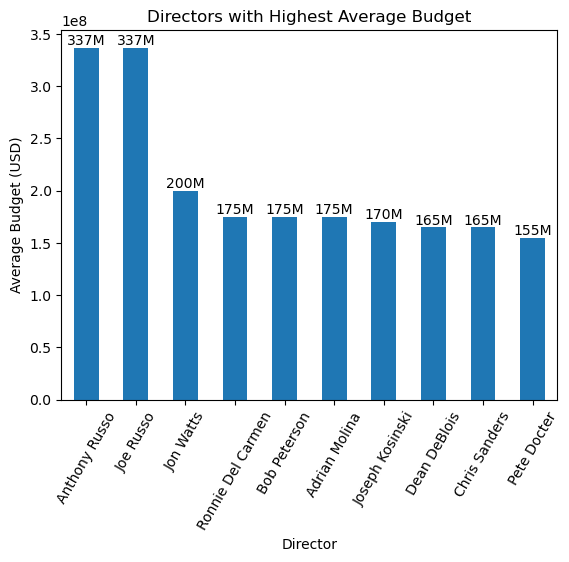

In [76]:
plt = directors_with_highest_average_budget_usd.plot(kind="bar",
                                                     rot=60,
                                                     legend=False,
                                                     title="Directors with Highest Average Budget",
                                                     xlabel="Director",
                                                     ylabel="Average Budget (USD)"
                                                    )

for i, v in enumerate(directors_with_highest_average_budget_usd['budget_amount']):
    plt.text(i, v, f'{round(v / 1_000_000)}M', ha='center', va='bottom')

In [85]:
top_comedic_directors = data[data["genre"] == "Comedy"][["rank", "director"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

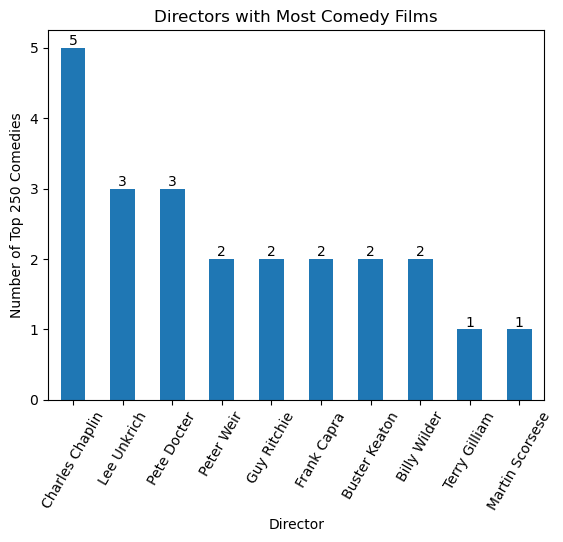

In [86]:
plt = top_comedic_directors.plot(kind="bar",
                                 rot=60,
                                 title="Directors with Most Comedy Films",
                                 xlabel="Director",
                                 ylabel="Number of Top 250 Comedies")

for i, v in enumerate(top_comedic_directors):
    plt.text(i, v, v, ha='center', va='bottom')

In [87]:
top_drama_directors = data[data["genre"] == "Drama"][["rank", "director"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

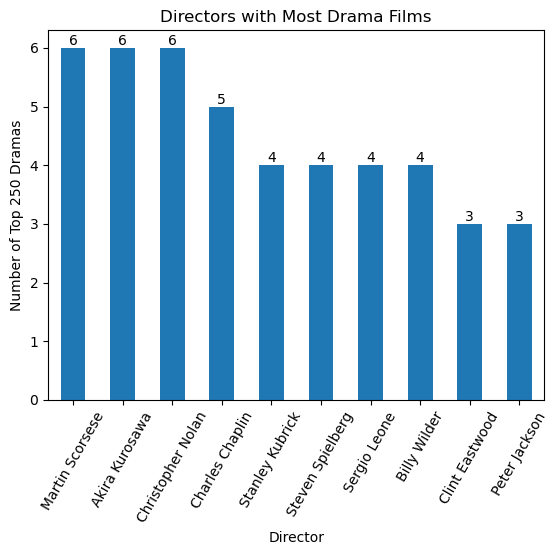

In [88]:
plt = top_drama_directors.plot(kind="bar",
                                 rot=60,
                                 title="Directors with Most Drama Films",
                                 xlabel="Director",
                                 ylabel="Number of Top 250 Dramas")

for i, v in enumerate(top_drama_directors):
    plt.text(i, v, v, ha='center', va='bottom')

In [89]:
top_action_directors = data[data["genre"] == "Action"][["rank", "director"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

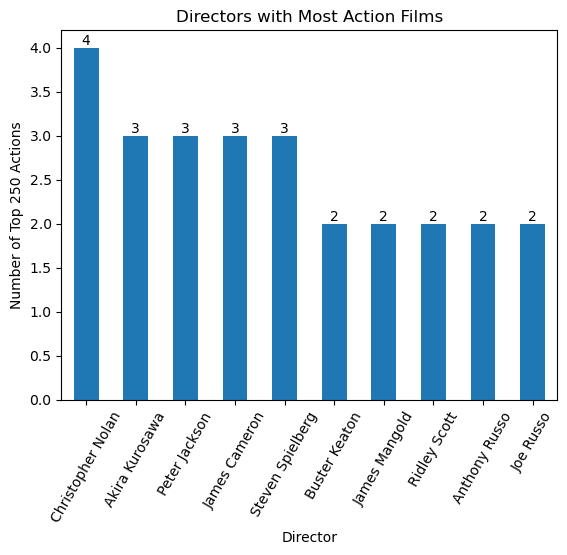

In [92]:
plt = top_action_directors.plot(kind="bar",
                                 rot=60,
                                 title="Directors with Most Action Films",
                                 xlabel="Director",
                                 ylabel="Number of Top 250 Actions")

for i, v in enumerate(top_action_directors):
    plt.text(i, v, v, ha='center', va='bottom')

In [93]:
top_crime_directors = data[data["genre"] == "Crime"][["rank", "director"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

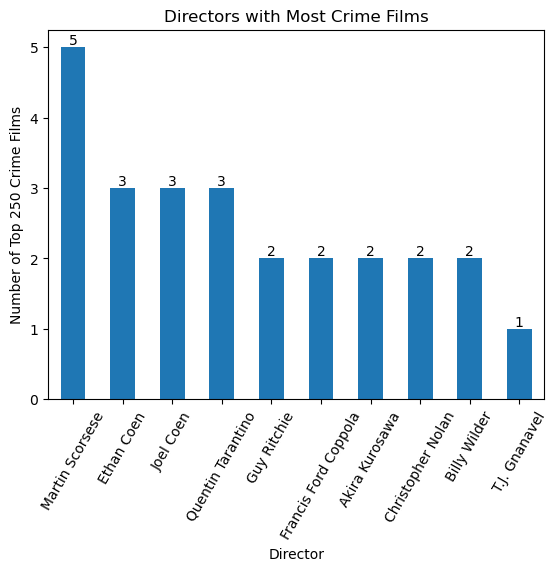

In [94]:
plt = top_crime_directors.plot(kind="bar",
                                 rot=60,
                                 title="Directors with Most Crime Films",
                                 xlabel="Director",
                                 ylabel="Number of Top 250 Crime Films")

for i, v in enumerate(top_crime_directors):
    plt.text(i, v, v, ha='center', va='bottom')

In [96]:
top_biopic_directors = data[data["genre"] == "Biography"][["rank", "director"]].groupby("director")["rank"].nunique().sort_values(ascending=False).head(10)

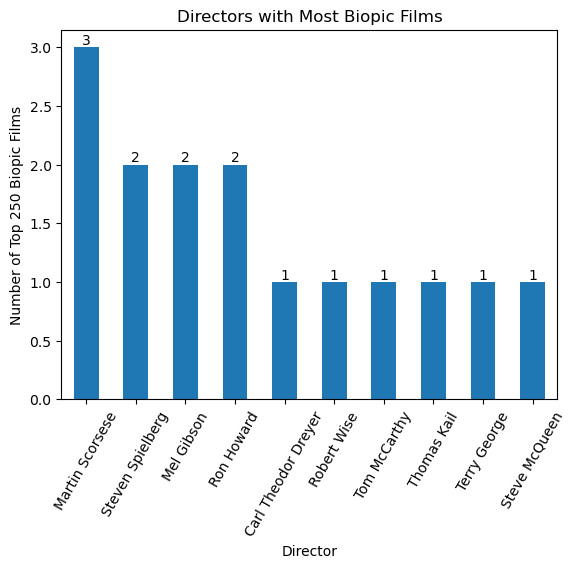

In [97]:
plt = top_biopic_directors.plot(kind="bar",
                                 rot=60,
                                 title="Directors with Most Biopic Films",
                                 xlabel="Director",
                                 ylabel="Number of Top 250 Biopic Films")

for i, v in enumerate(top_biopic_directors):
    plt.text(i, v, v, ha='center', va='bottom')